In [99]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
import sys
!{sys.executable} -m pip install pandas==0.24.2 numpy==1.15.4;

In [100]:
df = pd.read_csv("./data/train.csv")

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
import pandas_profiling

In [8]:
pandas_profiling.ProfileReport(df); # remove ; if you like see a raport

In [101]:
#uzupelnianie brakow
df.fillna(method='ffill', inplace=True)

In [104]:
#df.fillna(df.mode(dropna=True), inplace=True)
df.fillna(df.mode(dropna=True), inplace=True)

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ff71320>,
      dtype=object)

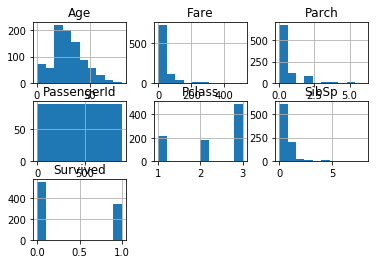

In [103]:
df.hist()

In [105]:
#kodowanie nazw na liczby #pamietaj o zrobieniu cos z brakami bo bedzie rzucalo wyjatkami
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,28,1,0,523,18,145,2
1,1,1,0,190,0,51,1,0,596,207,81,0
2,2,1,2,353,0,34,0,0,669,41,81,2
3,3,1,0,272,0,47,1,0,49,189,55,2
4,4,0,2,15,1,47,0,0,472,43,55,2
5,5,0,2,554,1,47,0,0,275,51,55,1
6,6,0,0,515,1,69,0,0,85,186,129,2
7,7,0,2,624,1,6,3,1,395,124,129,2
8,8,1,2,412,0,35,0,2,344,74,129,2
9,9,1,1,576,0,18,1,0,132,154,129,0


In [33]:
#feature selecting

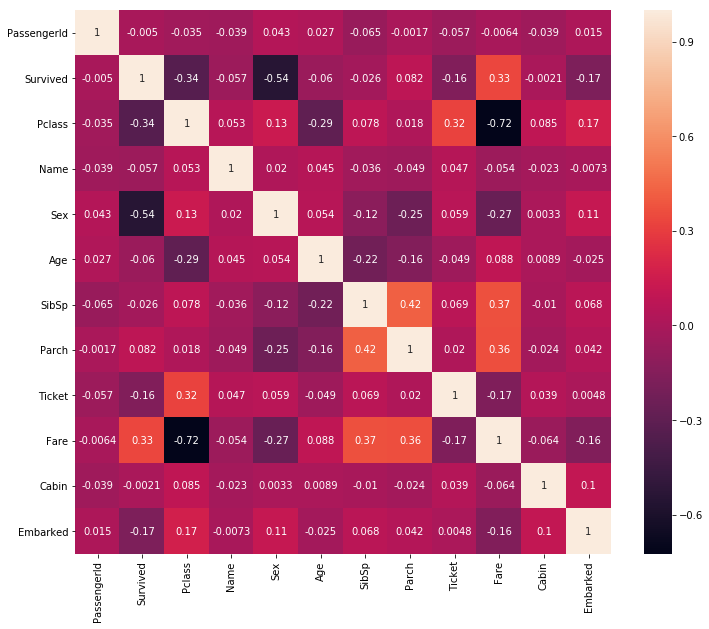

In [56]:
#korelacja persona
#pokazuje ostatnie 20-kolumn do dla wszystkich zmiennych wykres nie ejst czytelny
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [66]:
#Wybieram zmienne ktore ze przewidywana maja korelacje wieksza od 0.5
cor = df.corr()
cor_target = abs(cor["Survived"])

# #Correlation with output variable

#Selecting highly correlated features
relevant_features = cor_target[(cor_target>0.3) & (cor_target<1)]
relevant_features

Pclass    0.338481
Sex       0.543351
Fare      0.333943
Name: Survived, dtype: float64

In [106]:
y = df["Survived"]
X = df.loc[:, ~df.columns.isin(["Survived"])]

In [107]:
from sklearn.model_selection import train_test_split

#podzial zbior na testowy i traningowy
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=100)

In [111]:
import xgboost as xgb
clf= xgb.XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

In [112]:
clf = clf.fit(train_X, train_y)
predictions = clf.predict(test_X)

In [115]:
from sklearn.metrics import classification_report

print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       159
           1       0.84      0.64      0.73       109

   micro avg       0.81      0.81      0.81       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268

